In [1]:
import csv
import numpy as np
import pandas as pd
import math

In [33]:
# d = previous state distance to target
# b = previous state bearing to target
# d_meas = new measurement of distance to target
# b_meas = new measurement of bearing to target

def kalman_update(d, b, d_meas, d_bear):
    K = 0.7
    d_prime = K * d + (1-K) * d_meas
    b_prime = K * b + (1-K) * d_bear
    return (d_prime, b_prime)

In [34]:
# d = previous state distance to target
# b = previous state bearing to target
# m = amount moved forward

def kalman_predict(d, b, m):
    d_prime = math.sqrt(m * m + d * d - 2 * m * d * math.cos(b))
    b_prime = math.pi - math.asin(d * (math.sin(b)/d_prime))
    return d_prime, b_prime

In [35]:
# elapsed,g_forward_cmd,g_turn_cmd,g_shortest_bearing,g_shortest
df=pd.read_csv('moving.csv', sep=',')

In [36]:
state_dist = 1.5
state_bear = math.radians(0)
for index, row in df.iterrows():
    meas_dist = row['g_shortest']
    meas_bear = math.radians(row['g_shortest_bearing'])
    control_motion = row['g_forward_cmd'] * row['elapsed']
    state_dist, state_bear = kalman_predict(state_dist, state_bear, control_motion)
    state_dist, state_bear = kalman_update(state_dist, state_bear, meas_dist, meas_bear)
    df.loc[df.index[index], 'state_dist'] = state_dist
    df.loc[df.index[index], 'state_bear'] = math.degrees(state_bear)
    df.loc[df.index[index], 'meas_dist'] = meas_dist
    df.loc[df.index[index], 'meas_bear'] = math.degrees(meas_bear)

In [37]:
df

,elapsed,g_forward_cmd,g_turn_cmd,g_shortest_bearing,g_shortest,state_dist,state_bear,meas_dist,meas_bear
0,0.000,0.00,0.0,258.0,0.672,1.251600,203.400000,0.672,258.0
1,0.200,0.00,0.0,258.0,0.674,1.078320,219.780000,0.674,258.0
2,0.200,0.00,0.0,268.0,0.679,0.958524,234.246000,0.679,268.0
3,0.202,0.00,0.0,257.0,0.677,0.874067,241.072200,0.677,257.0
4,0.198,0.00,0.0,259.0,0.672,0.813447,246.450540,0.672,259.0
...,...,...,...,...,...,...,...,...,...
73,0.202,0.22,0.0,220.0,1.213,1.219273,220.238536,1.213,220.0
74,0.197,0.22,0.0,218.0,1.257,1.253969,218.670533,1.257,218.0
75,0.208,0.22,0.0,217.0,1.284,1.288209,217.280340,1.284,217.0
76,0.192,0.22,0.0,217.0,1.333,1.325346,216.420014,1.333,217.0


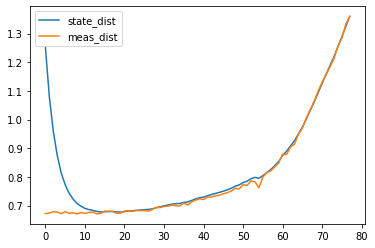

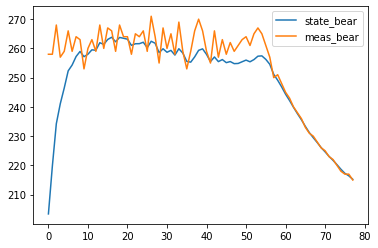

In [38]:
df.plot(y=['state_dist', 'meas_dist'])
df.plot(y=['state_bear', 'meas_bear'])

